### H4 - Amount of speech variation of seasons

In [24]:
import pandas as pd
import csv
import numpy as np
import pandas as pd

In [25]:
def amount_of_speech_over_seasons(season):
    df= pd.read_csv("../clean_data/csv/S"+str(season)+"-E1-clean.csv", 
                    names=["character","text"], header=0)
    episode=2
    while episode <=30:
        file= "../clean_data/csv/S"+str(season)+"-E"+str(episode)+"-clean.csv"
        try:
            temp_df = pd.read_csv(file, names=["character","text"], header=0)
            df=df.append(temp_df)
            episode= episode+1
        except:
            episode= episode+1
    df=df.reset_index(drop=True)
    #-- Add column with word count 
    words = df.text
    column_name='word_count_S'+str(season)
    df[column_name] = words.apply(lambda x: len(x.split()))
    # characters sorted by total word count
    total_word_count_per_character=df[['character', column_name]].groupby(
        'character').sum().sort_values(by=column_name, 
                                       ascending=False).reset_index()
    
    return total_word_count_per_character

In [26]:
def all_characters_seasons():
    df_seasons= pd.DataFrame(columns=['character', 'text'])
    season=1
    while season<10:
        episode=1
        while episode <=30:
            file= "../clean_data/csv/S"+str(season)+"-E"+str(episode)+"-clean.csv"
            try:
                temp_df = pd.read_csv(file, 
                                      names=["character","text"]
                                      , header=0)
                df_seasons=df_seasons.append(temp_df)
                episode= episode+1
            except:
                episode= episode+1
        df_seasons=df_seasons.reset_index(drop=True)
        season=season+1
        # characters sorted by total word count
    all_character=df_seasons[['character']]
    return all_character

In [27]:
all_characters = all_characters_seasons()
all_characters =all_characters.groupby('character').sum()
season=1
while season<10:
    temp=amount_of_speech_over_seasons(season)
    column_name='word_count_S'+str(season)
    word_count = temp[column_name]
    all_characters = pd.merge(all_characters, 
                              temp, 
                              on="character", 
                              how="outer")
    
    season=season+1

all_characters = all_characters.fillna(0)
all_characters =all_characters.sort_values('word_count_S1', 
                                           ascending=False).reset_index()
all_characters.drop('index', axis=1, inplace=True)

In [28]:
first_five=all_characters.head(5)
first_five

,character,word_count_S1,word_count_S2,word_count_S3,word_count_S4,word_count_S5,word_count_S6,word_count_S7,word_count_S8,word_count_S9
0,jack_o_neill,14951.0,12524.0,12901.0,14945.0,15291.0,12245.0,9666.0,8415.0,156.0
1,daniel_jackson,14002.0,11632.0,11122.0,12240.0,11933.0,2629.0,14150.0,10031.0,9519.0
2,samantha_carter,12411.0,14331.0,10939.0,13955.0,14956.0,14744.0,14756.0,12033.0,3952.0
3,hammond,6523.0,7323.0,4145.0,2826.0,5224.0,4834.0,5019.0,675.0,83.0
4,teal_c,5631.0,5682.0,4490.0,5058.0,4205.0,4746.0,4308.0,4829.0,2672.0


In [29]:
jack_o_neill=[first_five["word_count_S1"][0],
              first_five["word_count_S2"][0],
              first_five["word_count_S3"][0],
              first_five["word_count_S4"][0],
              first_five["word_count_S5"][0],
              first_five["word_count_S6"][0],
              first_five["word_count_S7"][0],
              first_five["word_count_S8"][0],
              first_five["word_count_S9"][0]]
jack_o_neill= pd.DataFrame(jack_o_neill, 
                           columns=[first_five["character"][0]])
jack_o_neill.index += 1 
jack_o_neill

,jack_o_neill
1,14951.0
2,12524.0
3,12901.0
4,14945.0
5,15291.0
6,12245.0
7,9666.0
8,8415.0
9,156.0


In [30]:
daniel_jackson=[first_five["word_count_S1"][1],
                first_five["word_count_S2"][1],
                first_five["word_count_S3"][1],
                first_five["word_count_S4"][1],
                first_five["word_count_S5"][1],
                first_five["word_count_S6"][1],
                first_five["word_count_S7"][1],
                first_five["word_count_S8"][1],
                first_five["word_count_S9"][1]]
daniel_jackson= pd.DataFrame(daniel_jackson, 
                             columns=[first_five["character"][1]])
daniel_jackson.index += 1 
daniel_jackson

,daniel_jackson
1,14002.0
2,11632.0
3,11122.0
4,12240.0
5,11933.0
6,2629.0
7,14150.0
8,10031.0
9,9519.0


In [31]:
samantha_carter=[first_five["word_count_S1"][2],
                 first_five["word_count_S2"][2],
                 first_five["word_count_S3"][2],
                 first_five["word_count_S4"][2],
                 first_five["word_count_S5"][2],
                 first_five["word_count_S6"][2],
                 first_five["word_count_S7"][2],
                 first_five["word_count_S8"][2],
                 first_five["word_count_S9"][2]]
samantha_carter= pd.DataFrame(samantha_carter, 
                              columns=[first_five["character"][2]])
samantha_carter.index += 1 
samantha_carter

,samantha_carter
1,12411.0
2,14331.0
3,10939.0
4,13955.0
5,14956.0
6,14744.0
7,14756.0
8,12033.0
9,3952.0


In [32]:
hammond=[first_five["word_count_S1"][3],
         first_five["word_count_S2"][3],
         first_five["word_count_S3"][3],
         first_five["word_count_S4"][3],
         first_five["word_count_S5"][3],
         first_five["word_count_S6"][3],
         first_five["word_count_S7"][3],
         first_five["word_count_S8"][3],
         first_five["word_count_S9"][3]]
hammond= pd.DataFrame(hammond, 
                      columns=[first_five["character"][3]])
hammond.index += 1 
hammond

,hammond
1,6523.0
2,7323.0
3,4145.0
4,2826.0
5,5224.0
6,4834.0
7,5019.0
8,675.0
9,83.0


In [33]:
teal_c=[first_five["word_count_S1"][4],
        first_five["word_count_S2"][4],
        first_five["word_count_S3"][4],
        first_five["word_count_S4"][4],
        first_five["word_count_S5"][4],
        first_five["word_count_S6"][4],
        first_five["word_count_S7"][4],
        first_five["word_count_S8"][4],
        first_five["word_count_S9"][4]]
teal_c= pd.DataFrame(teal_c, 
                     columns=[first_five["character"][4]])
teal_c.index += 1 
teal_c

,teal_c
1,5631.0
2,5682.0
3,4490.0
4,5058.0
5,4205.0
6,4746.0
7,4308.0
8,4829.0
9,2672.0


In [34]:
all_five= jack_o_neill.join(daniel_jackson)
all_five= all_five.join(samantha_carter)
all_five= all_five.join(hammond)
all_five= all_five.join(teal_c)
all_five

,jack_o_neill,daniel_jackson,samantha_carter,hammond,teal_c
1,14951.0,14002.0,12411.0,6523.0,5631.0
2,12524.0,11632.0,14331.0,7323.0,5682.0
3,12901.0,11122.0,10939.0,4145.0,4490.0
4,14945.0,12240.0,13955.0,2826.0,5058.0
5,15291.0,11933.0,14956.0,5224.0,4205.0
6,12245.0,2629.0,14744.0,4834.0,4746.0
7,9666.0,14150.0,14756.0,5019.0,4308.0
8,8415.0,10031.0,12033.0,675.0,4829.0
9,156.0,9519.0,3952.0,83.0,2672.0


In [35]:
all_characters =all_characters.sort_values('word_count_S6', 
                                           ascending=False).reset_index()
all_characters.drop('index', 
                    axis=1, 
                    inplace=True)
all_characters.head(5)

,character,word_count_S1,word_count_S2,word_count_S3,word_count_S4,word_count_S5,word_count_S6,word_count_S7,word_count_S8,word_count_S9
0,samantha_carter,12411.0,14331.0,10939.0,13955.0,14956.0,14744.0,14756.0,12033.0,3952.0
1,jack_o_neill,14951.0,12524.0,12901.0,14945.0,15291.0,12245.0,9666.0,8415.0,156.0
2,jonas,0.0,0.0,0.0,0.0,667.0,9751.0,2656.0,0.0,0.0
3,hammond,6523.0,7323.0,4145.0,2826.0,5224.0,4834.0,5019.0,675.0,83.0
4,teal_c,5631.0,5682.0,4490.0,5058.0,4205.0,4746.0,4308.0,4829.0,2672.0


In [36]:
jonas_quinn=[all_characters["word_count_S1"][2],
             all_characters["word_count_S2"][2],
             all_characters["word_count_S3"][2],
             all_characters["word_count_S4"][2],
             all_characters["word_count_S5"][2],
             all_characters["word_count_S6"][2],
             all_characters["word_count_S7"][2],
             all_characters["word_count_S8"][2],
             all_characters["word_count_S9"][2]]
jonas_quinn= pd.DataFrame(jonas_quinn, 
                          columns=["jonas_quinn"])
jonas_quinn.index += 1 
jonas_quinn

,jonas_quinn
1,0.0
2,0.0
3,0.0
4,0.0
5,667.0
6,9751.0
7,2656.0
8,0.0
9,0.0


In [37]:
all_characters =all_characters.sort_values('word_count_S9', 
                                           ascending=False).reset_index()
all_characters.drop('index', axis=1, inplace=True)
all_characters.head(5)

cameron_mitchell=[all_characters["word_count_S1"][1],
                  all_characters["word_count_S2"][1],
                  all_characters["word_count_S3"][1],
                  all_characters["word_count_S4"][1],
                  all_characters["word_count_S5"][1],
                  all_characters["word_count_S6"][1],
                  all_characters["word_count_S7"][1],
                  all_characters["word_count_S8"][1],
                  all_characters["word_count_S9"][1]]
cameron_mitchell= pd.DataFrame(cameron_mitchell, 
                               columns=["cameron_mitchell"])
cameron_mitchell.index += 1 
cameron_mitchell

vala_mal_doran=[all_characters["word_count_S1"][2],
                all_characters["word_count_S2"][2],
                all_characters["word_count_S3"][2],
                all_characters["word_count_S4"][2],
                all_characters["word_count_S5"][2],
                all_characters["word_count_S6"][2],
                all_characters["word_count_S7"][2],
                all_characters["word_count_S8"][2],
                all_characters["word_count_S9"][2]]
vala_mal_doran= pd.DataFrame(vala_mal_doran, 
                             columns=["vala_mal_doran"])
vala_mal_doran.index += 1 
vala_mal_doran

hank_landry=[all_characters["word_count_S1"][3],
             all_characters["word_count_S2"][3],
             all_characters["word_count_S3"][3],
             all_characters["word_count_S4"][3],
             all_characters["word_count_S5"][3],
             all_characters["word_count_S6"][3],
             all_characters["word_count_S7"][3],
             all_characters["word_count_S8"][3],
             all_characters["word_count_S9"][3]]
hank_landry= pd.DataFrame(hank_landry, columns=["hank_landry"])
hank_landry.index += 1 
hank_landry

,hank_landry
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,4650.0


In [38]:
all_five= all_five.join(jonas_quinn)
all_five= all_five.join(cameron_mitchell)
all_five= all_five.join(vala_mal_doran)
all_five= all_five.join(hank_landry)
all_five

,jack_o_neill,daniel_jackson,samantha_carter,hammond,teal_c,jonas_quinn,cameron_mitchell,vala_mal_doran,hank_landry
1,14951.0,14002.0,12411.0,6523.0,5631.0,0.0,0.0,0.0,0.0
2,12524.0,11632.0,14331.0,7323.0,5682.0,0.0,0.0,0.0,0.0
3,12901.0,11122.0,10939.0,4145.0,4490.0,0.0,0.0,0.0,0.0
4,14945.0,12240.0,13955.0,2826.0,5058.0,0.0,0.0,0.0,0.0
5,15291.0,11933.0,14956.0,5224.0,4205.0,667.0,0.0,0.0,0.0
6,12245.0,2629.0,14744.0,4834.0,4746.0,9751.0,0.0,0.0,0.0
7,9666.0,14150.0,14756.0,5019.0,4308.0,2656.0,0.0,0.0,0.0
8,8415.0,10031.0,12033.0,675.0,4829.0,0.0,0.0,865.0,0.0
9,156.0,9519.0,3952.0,83.0,2672.0,0.0,6735.0,6583.0,4650.0


Text(0.5, 0, 'season')

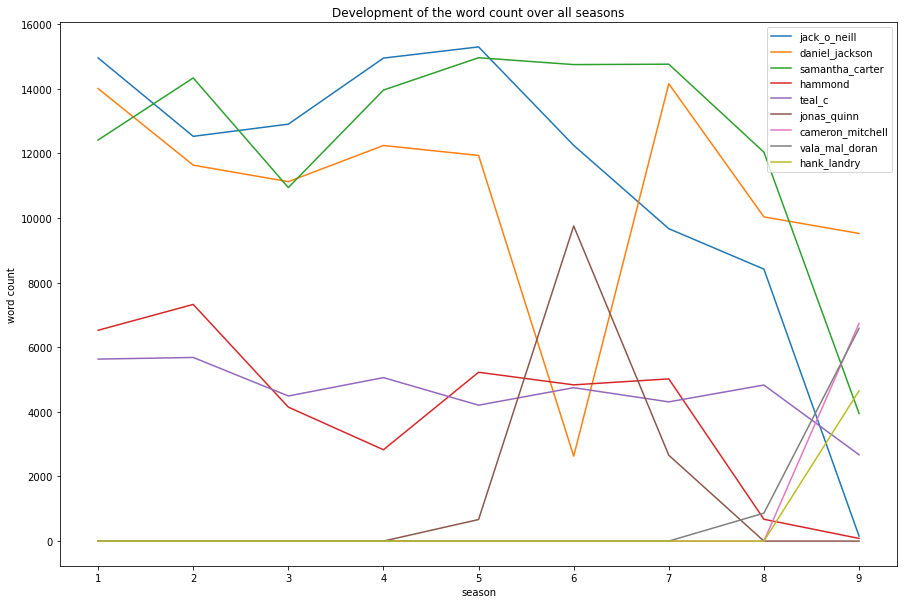

In [39]:
#line plot
line_chart =all_five.plot.line(figsize=(15,10), 
                               title="Development of the word count over all seasons")
line_chart.set_ylabel("word count")
line_chart.set_xlabel("season")

In [40]:
#word count in relation to total amount of words spoken
total_words=[]
s=1
while s<10:
    column_name="word_count_S"+str(s)
    total_words_season = all_characters[column_name].sum()
    total_words.append(total_words_season)
    s=s+1
total_words

[76413.0,
 77922.0,
 72920.0,
 82856.0,
 89922.0,
 89233.0,
 98728.0,
 64967.0,
 51121.0]

In [41]:
rel_word_count=all_five.copy()
rel_word_count

,jack_o_neill,daniel_jackson,samantha_carter,hammond,teal_c,jonas_quinn,cameron_mitchell,vala_mal_doran,hank_landry
1,14951.0,14002.0,12411.0,6523.0,5631.0,0.0,0.0,0.0,0.0
2,12524.0,11632.0,14331.0,7323.0,5682.0,0.0,0.0,0.0,0.0
3,12901.0,11122.0,10939.0,4145.0,4490.0,0.0,0.0,0.0,0.0
4,14945.0,12240.0,13955.0,2826.0,5058.0,0.0,0.0,0.0,0.0
5,15291.0,11933.0,14956.0,5224.0,4205.0,667.0,0.0,0.0,0.0
6,12245.0,2629.0,14744.0,4834.0,4746.0,9751.0,0.0,0.0,0.0
7,9666.0,14150.0,14756.0,5019.0,4308.0,2656.0,0.0,0.0,0.0
8,8415.0,10031.0,12033.0,675.0,4829.0,0.0,0.0,865.0,0.0
9,156.0,9519.0,3952.0,83.0,2672.0,0.0,6735.0,6583.0,4650.0


In [42]:
test= rel_word_count.values.tolist()
test[0]

[14951.0, 14002.0, 12411.0, 6523.0, 5631.0, 0.0, 0.0, 0.0, 0.0]

In [43]:
list_relative_word_count=[]
row=[]
for x in test[0]:
    #print(x)
    x=x/total_words[0]*100
    row.append(x)
    #print(total_words[0])
    
list_relative_word_count.append(row) 

row=[]
for x in test[1]:
    #print(x)
    x=x/total_words[1]*100
    row.append(x)
    #print(total_words[1])
    
list_relative_word_count.append(row)

row=[]
for x in test[2]:
    x=x/total_words[2]*100
    #print(total_words[2])
    row.append(x)  
list_relative_word_count.append(row)

row=[]
for x in test[3]:
    x=x/total_words[3]*100
    #print(total_words[3])
    row.append(x)  
list_relative_word_count.append(row)

row=[]
for x in test[4]:
    x=x/total_words[4]*100
    #print(total_words[4])
    row.append(x)  
list_relative_word_count.append(row)

row=[]
for x in test[5]:
    x=x/total_words[5]*100
    #print(total_words[5])
    row.append(x)  
list_relative_word_count.append(row)

row=[]
for x in test[6]:
    x=x/total_words[6]*100
    row.append(x)  
list_relative_word_count.append(row)

row=[]
for x in test[7]:
    x=x/total_words[7]*100
    row.append(x)  
list_relative_word_count.append(row)

row=[]
for x in test[8]:
    x=x/total_words[8]*100
    row.append(x)  
list_relative_word_count.append(row)
        

In [44]:
list_relative_word_count[0]

[19.56604242733566,
 18.324107154541768,
 16.242000706686035,
 8.536505568424221,
 7.369164932668524,
 0.0,
 0.0,
 0.0,
 0.0]

In [45]:
all_five_rel=pd.DataFrame(list_relative_word_count, 
                          columns= ["jack_o_neill", 
                                    "daniel_jackson", 
                                    "samantha_carter",
                                    "hammond",
                                    "teal_c", 
                                    "jonas_quinn", 
                                    "cameron_mitchell", 
                                    "vala_mal_doran", 
                                    "hank_landry"])
all_five_rel.index += 1
all_five_rel

,jack_o_neill,daniel_jackson,samantha_carter,hammond,teal_c,jonas_quinn,cameron_mitchell,vala_mal_doran,hank_landry
1,19.566042,18.324107,16.242001,8.536506,7.369165,0.000000,0.000000,0.000000,0.000000
2,16.072483,14.927748,18.391468,9.397859,7.291907,0.000000,0.000000,0.000000,0.000000
3,17.691991,15.252331,15.001371,5.684312,6.157433,0.000000,0.000000,0.000000,0.000000
4,18.037318,14.772618,16.842474,3.410737,6.104567,0.000000,0.000000,0.000000,0.000000
5,17.004737,13.270390,16.632192,5.809479,4.676275,0.741754,0.000000,0.000000,0.000000
6,13.722502,2.946219,16.523035,5.417278,5.318660,10.927572,0.000000,0.000000,0.000000
7,9.790536,14.332307,14.946115,5.083664,4.363504,2.690220,0.000000,0.000000,0.000000
8,12.952730,15.440147,18.521711,1.038989,7.433004,0.000000,0.000000,1.331445,0.000000
9,0.305158,18.620528,7.730678,0.162360,5.226815,0.000000,13.174625,12.877291,9.096066


Text(0.5, 0, 'season')

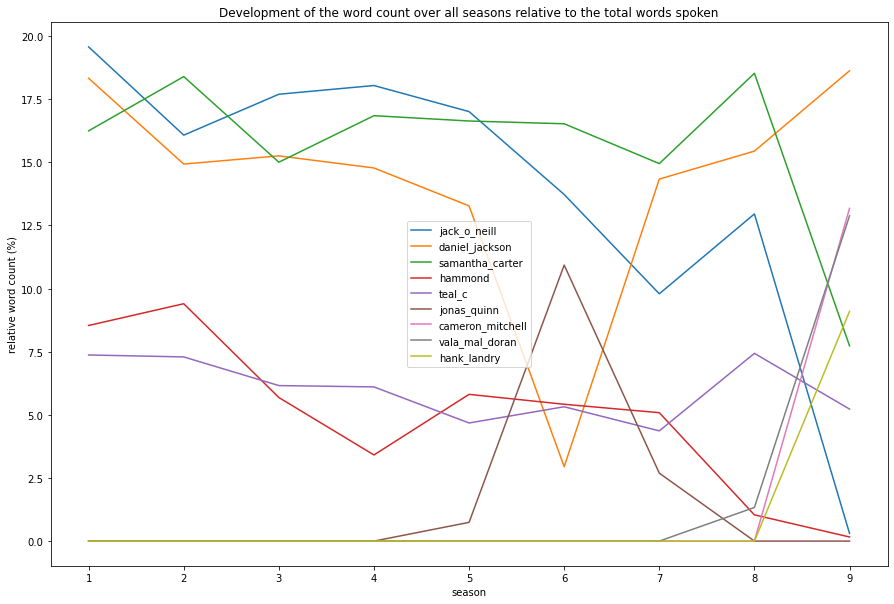

In [46]:
#line plot
line_chart =all_five_rel.plot.line(figsize=(15,10), 
                                   title="Development of the word count over all seasons relative to the total words spoken")
line_chart.set_ylabel("relative word count (%)")
line_chart.set_xlabel("season")